In [2]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats

# Study data files
UE_data_path = "../Data/Unemployment_rates_states_5yrs_Clean.csv"

UE_data_path = pd.read_csv(UE_data_path)
UE_data_path.head(20)

,State,1/1/2015,2/1/2015,3/1/2015,4/1/2015,5/1/2015,6/1/2015,7/1/2015,8/1/2015,9/1/2015,...,12/1/2019,1/1/2020,2/1/2020,3/1/2020,4/1/2020,5/1/2020,6/1/2020,7/1/2020,8/1/2020,9/20/2020
0,Alabama,6.0,6.0,6.1,6.1,6.2,6.2,6.2,6.1,6.1,...,2.7,2.7,2.7,3,13.8,9.6,7.6,7.9,5.6,6.6
1,Alaska,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,...,6.1,6.0,5.8,5.2,13.5,12.7,12.4,11.6,7.4,7.2
2,Arizona,6.4,6.3,6.3,6.2,6.1,6.1,6.0,6.0,5.9,...,4.5,4.5,4.5,6.1,13.4,9.0,10.0,10.7,5.9,6.7
3,Arkansas,5.6,5.5,5.5,5.4,5.3,5.1,5.0,4.8,4.7,...,3.5,3.5,3.5,5,10.8,9.6,8.1,7.1,7.4,7.3
4,California,6.8,6.7,6.6,6.5,6.4,6.2,6.1,6.0,5.9,...,3.9,3.9,3.9,5.5,16.4,16.4,14.9,13.5,11.2,11.0
5,Colorado,4.3,4.2,4.2,4.1,4.1,4.0,3.8,3.7,3.6,...,2.5,2.5,2.5,5.2,12.2,10.2,10.6,7.4,6.7,6.4
6,Connecticut,6.1,6.0,5.9,5.8,5.7,5.7,5.6,5.6,5.6,...,3.8,3.7,3.8,3.4,8.3,9.6,10.1,10.2,8.1,7.8
7,Delaware,5.1,5.0,5.0,4.9,4.9,4.9,4.8,4.8,4.8,...,4.0,4.0,3.9,5,14.9,15.9,12.6,10.5,8.9,8.2
8,District of Columbia,7.4,7.3,7.2,7.1,7.0,6.9,6.8,6.7,6.6,...,5.3,5.2,5.1,6,11.7,8.8,8.7,8.5,8.6,8.7
9,Florida,5.8,5.7,5.7,5.6,5.6,5.5,5.4,5.4,5.3,...,2.9,2.8,2.8,4.4,13.8,13.7,10.3,11.4,7.3,7.6


In [2]:
print ("data-frame shape: ", UE_data_path.shape)

data-frame shape:  (52, 70)


In [3]:
col = []
for x in UE_data_path.columns:
    if x != "State":
        col.append(x)

col

['1/1/2015',
 '2/1/2015',
 '3/1/2015',
 '4/1/2015',
 '5/1/2015',
 '6/1/2015',
 '7/1/2015',
 '8/1/2015',
 '9/1/2015',
 '10/1/2015',
 '11/1/2015',
 '12/1/2015',
 '1/1/2016',
 '2/1/2016',
 '3/1/2016',
 '4/1/2016',
 '5/1/2016',
 '6/1/2016',
 '7/1/2016',
 '8/1/2016',
 '9/1/2016',
 '10/1/2016',
 '11/1/2016',
 '12/1/2016',
 '1/1/2017',
 '2/1/2017',
 '3/1/2017',
 '4/1/2017',
 '5/1/2017',
 '6/1/2017',
 '7/1/2017',
 '8/1/2017',
 '9/1/2017',
 '10/1/2017',
 '11/1/2017',
 '12/1/2017',
 '1/1/2018',
 '2/1/2018',
 '3/1/2018',
 '4/1/2018',
 '5/1/2018',
 '6/1/2018',
 '7/1/2018',
 '8/1/2018',
 '9/1/2018',
 '10/1/2018',
 '11/1/2018',
 '12/1/2018',
 '1/1/2019',
 '2/1/2019',
 '3/1/2019',
 '4/1/2019',
 '5/1/2019',
 '6/1/2019',
 '7/1/2019',
 '8/1/2019',
 '9/1/2019',
 '10/1/2019',
 '11/1/2019',
 '12/1/2019',
 '1/1/2020',
 '2/1/2020',
 '3/1/2020',
 '4/1/2020',
 '5/1/2020',
 '6/1/2020',
 '7/1/2020',
 '8/1/2020',
 '9/20/2020']

In [4]:
d = []
for i, row in UE_data_path.iterrows():
    state = row["State"]
    for x in col:
        dat = x.split("/")
        a ={
            "State":state,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Unemployment Rate":row[x]
        }
        d.append(a)

In [5]:
UENew_df = pd.DataFrame(d)
UENew_df.head(20)

,State,Date,Year,Month,Unemployment Rate
0,Alabama,01-01-2015,2015,1,6
1,Alabama,02-01-2015,2015,2,6
2,Alabama,03-01-2015,2015,3,6.1
3,Alabama,04-01-2015,2015,4,6.1
4,Alabama,05-01-2015,2015,5,6.2
5,Alabama,06-01-2015,2015,6,6.2
6,Alabama,07-01-2015,2015,7,6.2
7,Alabama,08-01-2015,2015,8,6.1
8,Alabama,09-01-2015,2015,9,6.1
9,Alabama,10-01-2015,2015,10,6


In [6]:
print ("column names: ", UENew_df.columns.values)

column names:  ['State' 'Date' 'Year' 'Month' 'Unemployment Rate']


In [7]:
print ("total null values: ", UE_data_path.isna().sum().sum())

total null values:  0


In [8]:
UENew_df["Unemployment Rate"] = pd.to_numeric(UENew_df["Unemployment Rate"], errors='coerce')
UENew_dfgroup_data = UENew_df.groupby("Month")["Unemployment Rate"].sum()
UENew_dfgroup_data

Month
1     1375.5
10    1112.0
11    1106.0
12    1100.9
2     1364.2
3     1378.9
4     1880.7
5     1788.3
6     1649.9
7     1608.8
8     1528.0
9     1493.3
Name: Unemployment Rate, dtype: float64

In [9]:
UENew_df["Unemployment Rate"] = pd.to_numeric(UENew_df["Unemployment Rate"], errors='coerce')
UENew_dfgroup_data = UENew_df.groupby("Year")["Unemployment Rate"].sum()
UENew_dfgroup_data

Year
2015    3227.1
2016    3002.0
2017    2686.2
2018    2436.7
2019    2315.4
2020    3719.1
Name: Unemployment Rate, dtype: float64

In [3]:
PIT_EstHM = "../Data/2015-2019-PITEstimatesState_Clean.csv"
PIT_EstHM = pd.read_csv(PIT_EstHM )
PIT_EstHM

,Year,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,2019.0,AK,2.0,"1,907",335,204,"1,368",761,"1,137",6,...,20,6,14,20,0.0,27,13,14,27,0.0
1,2019.0,AL,8.0,"3,261",629,199,"2,433","1,383","1,873",3,...,22,10,11,21,1.0,34,17,13,30,4.0
2,2019.0,AR,5.0,"2,717",303,317,"2,097","1,022","1,688",4,...,11,7,4,11,0.0,15,10,5,15,0.0
3,2019.0,AZ,3.0,"10,007","1,602",708,"7,697","3,683","6,297",16,...,58,17,40,57,1.0,80,26,53,79,1.0
4,2019.0,CA,44.0,"151,278","14,305","12,673","124,300","50,467","98,404","1,764",...,"1,019",457,291,748,271.0,"1,194",555,357,912,282.0
5,2019.0,CO,3.0,"9,619","1,458",685,"7,476","3,238","6,289",54,...,80,19,59,78,2.0,111,21,83,104,7.0
6,2019.0,CT,2.0,"3,033",588,272,"2,173","1,133","1,895",4,...,58,25,31,56,2.0,81,36,42,78,3.0
7,2019.0,DC,1.0,"6,521","1,606",546,"4,369","2,649","3,823",40,...,214,116,98,214,0.0,272,151,121,272,0.0
8,2019.0,DE,1.0,921,220,83,618,373,546,1,...,16,10,5,15,1.0,21,14,6,20,1.0
9,2019.0,FL,27.0,"28,328","4,703","1,625","22,000","9,884","18,357",67,...,253,140,91,231,22.0,419,228,158,386,33.0


In [11]:
# Group data by year
PIT_EstHM ["Overall Homeless"] = pd.to_numeric(PIT_EstHM["Overall Homeless"], errors='coerce')
PIT_EstHMgroup_data = PIT_EstHM.groupby("Year")["Overall Homeless"].sum()
PIT_EstHMgroup_data

Year
2019.0    4210.0
Name: Overall Homeless, dtype: float64

In [12]:
# excel file load
file_path = os.path.join("../Data/2015-2019-PITEstimatesState_Clean.xlsx")

# reading the xlsx file
df  = pd.read_excel(file_path, sheet_name=None)

# concatenate worksheets
cdf = pd.concat(df.values())

# displaying consolidated data
cdf.head(20)

,Year,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,2019,AK,2,1907,335,204,1368,761,1137,6,...,20,6,14,20,0,27,13,14,27,0
1,2019,AL,8,3261,629,199,2433,1383,1873,3,...,22,10,11,21,1,34,17,13,30,4
2,2019,AR,5,2717,303,317,2097,1022,1688,4,...,11,7,4,11,0,15,10,5,15,0
3,2019,AZ,3,10007,1602,708,7697,3683,6297,16,...,58,17,40,57,1,80,26,53,79,1
4,2019,CA,44,151278,14305,12673,124300,50467,98404,1764,...,1019,457,291,748,271,1194,555,357,912,282
5,2019,CO,3,9619,1458,685,7476,3238,6289,54,...,80,19,59,78,2,111,21,83,104,7
6,2019,CT,2,3033,588,272,2173,1133,1895,4,...,58,25,31,56,2,81,36,42,78,3
7,2019,DC,1,6521,1606,546,4369,2649,3823,40,...,214,116,98,214,0,272,151,121,272,0
8,2019,DE,1,921,220,83,618,373,546,1,...,16,10,5,15,1,21,14,6,20,1
9,2019,FL,27,28328,4703,1625,22000,9884,18357,67,...,253,140,91,231,22,419,228,158,386,33


In [13]:
# grouping data for check
cdf["Overall Homeless"] = pd.to_numeric(cdf["Overall Homeless"], errors='coerce')
cdfgroup_data = cdf.groupby("Year")["Overall Homeless"].sum()
cdfgroup_data

Year
2015    1129416.0
2016    1099856.0
2017    1101992.0
2018    1105660.0
2019    1135430.0
Name: Overall Homeless, dtype: float64

In [14]:
cdf.dropna(axis=1, how='any')
cdf.count()

Year                                                    280
State                                                   280
Number of CoCs                                          280
Overall Homeless                                        278
Overall Homeless - Under 18                             280
                                                       ... 
Overall Homeless Children of Parenting Youth            280
Sheltered ES Homeless Children of Parenting Youth       280
Sheltered TH Homeless Children of Parenting Youth       280
Sheltered Total Homeless Children of Parenting Youth    280
Unsheltered Homeless Children of Parenting Youth        280
Length: 542, dtype: int64

In [16]:
# check interested column count before output file
cdf = cdf[['Year', 'State', 'Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless',
           'Overall Homeless Individuals','Sheltered Total Homeless Individuals', 'Unsheltered Homeless Individuals', 
           'Overall Homeless People in Families', 'Sheltered Total Homeless People in Families', 'Unsheltered Homeless People in Families',
            'Overall Homeless Family Households', 'Sheltered Total Homeless Family Households', 'Unsheltered Homeless Family Households','Overall Chronically Homeless', 'Sheltered Total Chronically Homeless',	
            'Unsheltered Chronically Homeless',	'Overall Chronically Homeless Individuals', 'Sheltered Total Chronically Homeless Individuals', 'Unsheltered Chronically Homeless Individuals',	'Overall Chronically Homeless People in Families',
           'Sheltered Total Chronically Homeless People in Families','Unsheltered Chronically Homeless People in Families','Overall Homeless Veterans', 'Sheltered Total Homeless Veterans','Unsheltered Homeless Veterans']]

cdf = cdf.set_index(['Year'])
cdf.count()

State                                                      280
Overall Homeless                                           278
Sheltered Total Homeless                                   280
Unsheltered Homeless                                       280
Overall Homeless Individuals                               280
Sheltered Total Homeless Individuals                       280
Unsheltered Homeless Individuals                           280
Overall Homeless People in Families                        280
Sheltered Total Homeless People in Families                280
Unsheltered Homeless People in Families                    280
Overall Homeless Family Households                         280
Sheltered Total Homeless Family Households                 280
Unsheltered Homeless Family Households                     280
Overall Chronically Homeless                               280
Sheltered Total Chronically Homeless                       280
Unsheltered Chronically Homeless                       

In [17]:
# consolidated data exported to csv
#cdf.to_csv("../Data/PIT_AllYearsData_Output.csv")

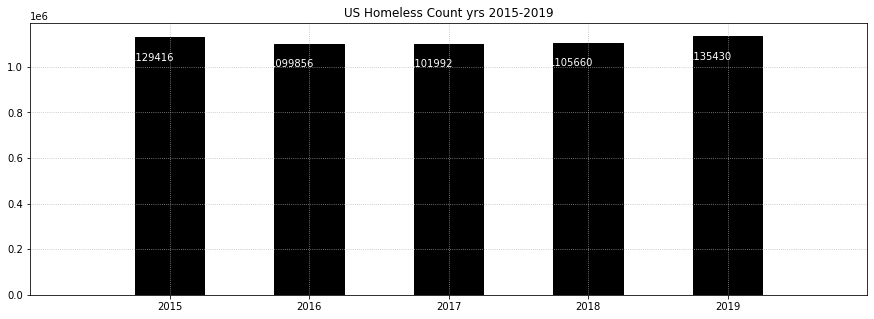

In [23]:
fig = plt.figure(figsize=(15,5))
x = cdfgroup_data.index
y = cdfgroup_data
bar_width = 0.50
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="black", ec=edgecolor, lw=1)

# Set Graph Properties
plt.title('US Homeless Count yrs 2015-2019') 
plt.grid(True,linestyle=':', alpha=0.90)
plt.xlim(2014, x.max()+1)
plt.xticks(x, cdfgroup_data.index)

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x()+ bar.get_width()/4., 0.9*height,'%s' % (str(int(height))), ha='center', va='bottom', color="white")
plt.show()

In [5]:
PIT_EstHM_All = "../Data/PIT_AllYearsData_Output.csv"
PIT_EstHM_All = pd.read_csv(PIT_EstHM_All)
PIT_EstHM_All.head(20)

,Year,State,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Overall Homeless People in Families,Sheltered Total Homeless People in Families,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans
0,2019,AK,1907.0,1634,273,1384,1118,266,523,516,...,99,231,134,97,38,36,2,111,85,26
1,2019,AL,3261.0,2070,1191,2519,1429,1090,742,641,...,139,350,221,129,19,9,10,292,223,69
2,2019,AR,2717.0,1302,1415,2303,972,1331,414,330,...,453,676,223,453,15,15,0,238,153,85
3,2019,AZ,10007.0,5475,4532,7538,3099,4439,2469,2376,...,1210,1766,599,1167,110,67,43,910,598,312
4,2019,CA,151278.0,42846,108432,128777,25323,103454,22501,17523,...,33670,39275,6483,32792,2282,1404,878,10980,3261,7719
5,2019,CO,9619.0,7431,2188,7263,5228,2035,2356,2203,...,918,2106,1211,895,81,58,23,1068,792,276
6,2019,CT,3033.0,2577,456,2100,1648,452,933,929,...,73,202,129,73,12,12,0,195,182,13
7,2019,DC,6521.0,5913,608,3875,3267,608,2646,2646,...,311,1374,1063,311,314,314,0,297,262,35
8,2019,DE,921.0,826,95,565,489,76,356,337,...,37,119,86,33,49,45,4,65,61,4
9,2019,FL,28328.0,15852,12476,21265,9953,11312,7063,5899,...,3888,5181,1456,3725,548,385,163,2472,1576,896


In [6]:
PITEstHM_Change = PIT_EstHM_All[PIT_EstHM_All["Year"].isin([2015, 2016, 2017, 2018, 2019])]
PITEstHM_Change_group = PITEstHM_Change.groupby(["Year","State"])["Overall Homeless"].sum()
PITEstHM_Change = pd.DataFrame(PITEstHM_Change_group)
PITEstHM_Change = PITEstHM_Change.reset_index()
PITEstHM_Change = PITEstHM_Change.pivot(index='State', columns='Year', values='Overall Homeless')
PITEstHM_Change

Year,2015,2016,2017,2018,2019
State,,,,,
AK,1956.0,1940.0,1845.0,2016.0,1907.0
AL,3970.0,4111.0,3793.0,3434.0,3261.0
AR,2560.0,2463.0,2467.0,2712.0,2717.0
AZ,9896.0,9707.0,8947.0,9865.0,10007.0
CA,115738.0,118142.0,131532.0,129972.0,151278.0
CO,9953.0,10550.0,10940.0,10857.0,9619.0
CT,4047.0,3902.0,3388.0,3976.0,3033.0
DC,7298.0,8350.0,7473.0,6904.0,6521.0
DE,953.0,1070.0,994.0,1082.0,921.0
